<a href="https://colab.research.google.com/github/nekroz-coder/MachineLearning/blob/main/week6/K_Means_Clustering_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Ganti 'nama_file.csv' dengan nama file dataset yang sesuai
file_path = '/content/drive/MyDrive/Dataset/Mall_Customers.csv'

# Membaca dataset dan mengubahnya menjadi DataFrame
df = pd.read_csv(file_path)

# Sekarang Anda memiliki dataset dalam bentuk DataFrame yang siap untuk dianalisis


In [2]:
# Menggunakan metode rename untuk mengganti nama atribut
df = df.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
})

# Sekarang DataFrame df akan memiliki nama atribut yang telah diubah

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Menggunakan metode drop() untuk menghapus kolom CustomerID dan Gender
df = df.drop(['CustomerID', 'Gender'], axis=1)

# Sekarang DataFrame df akan tidak memiliki kolom CustomerID dan Gender

In [5]:
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

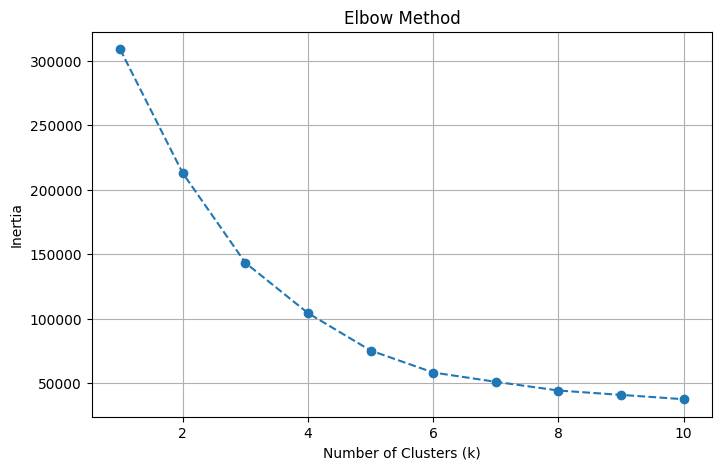

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengambil data yang akan digunakan untuk clustering
data = df[['Age', 'Annual Income', 'Spending Score']]

# Menginisialisasi list untuk menyimpan nilai inersia (inertia) untuk setiap nilai k
inertia = []

# Melakukan perulangan untuk berbagai nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


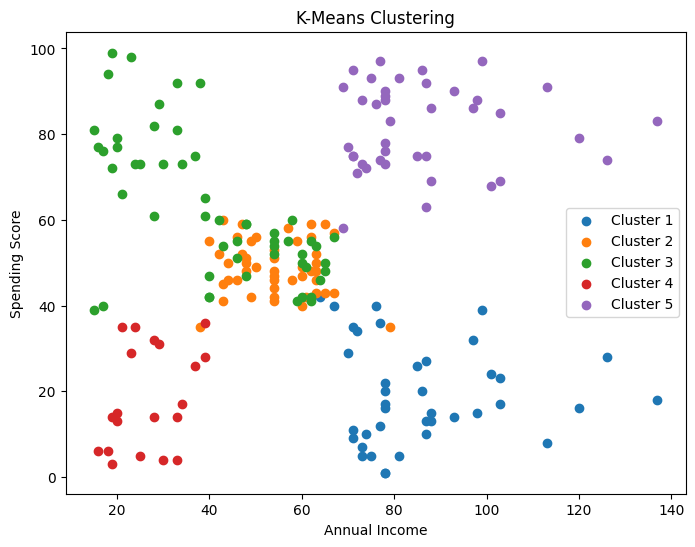

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pilih atribut yang akan digunakan
attributes = df[['Age', 'Annual Income', 'Spending Score']]

# Standarisasi atribut
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# Inisialisasi model K-Means dengan 5 cluster
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit model ke data
kmeans.fit(attributes_scaled)

# Menambahkan kolom label ke DataFrame
df['label'] = kmeans.labels_

# Memvisualisasikan data berdasarkan label
plt.figure(figsize=(8, 6))

# Membuat plot untuk setiap cluster
for label in range(5):
    plt.scatter(df[df['label'] == label]['Annual Income'], df[df['label'] == label]['Spending Score'], label=f'Cluster {label + 1}')

plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

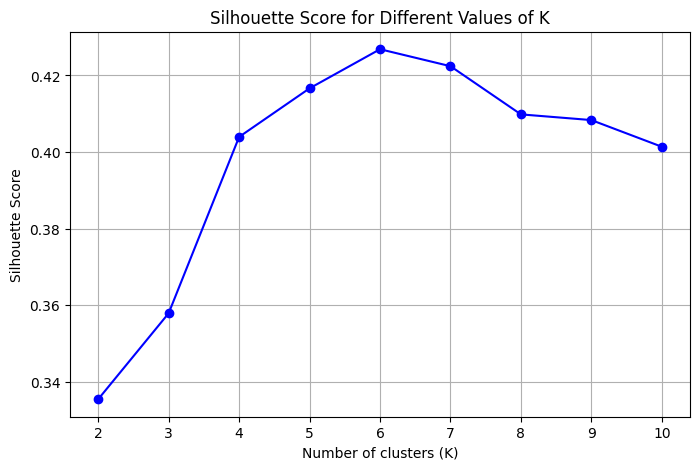

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Pilih atribut yang akan digunakan
attributes = df[['Age', 'Annual Income', 'Spending Score']]

# Standarisasi atribut
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# Inisialisasi daftar untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Mencoba nilai K dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(attributes_scaled)
    silhouette_avg = silhouette_score(attributes_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Memplot hasil Silhouette Score untuk setiap nilai K
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

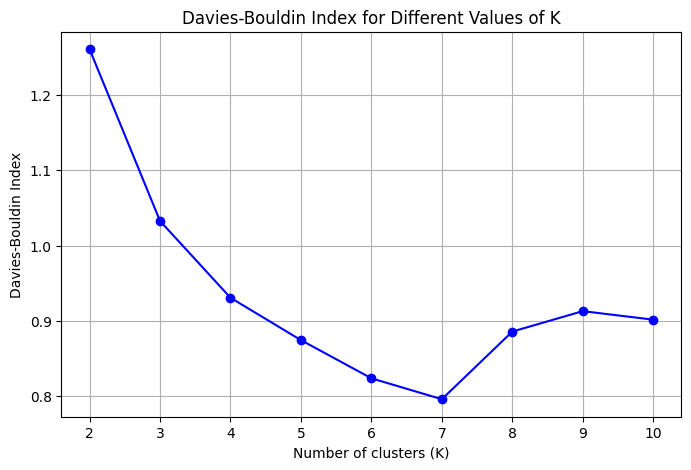

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Pilih atribut yang akan digunakan
attributes = df[['Age', 'Annual Income', 'Spending Score']]

# Standarisasi atribut
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# Inisialisasi daftar untuk menyimpan nilai Davies-Bouldin Index
davies_bouldin_scores = []

# Mencoba nilai K dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(attributes_scaled)
    dbi_score = davies_bouldin_score(attributes_scaled, labels)
    davies_bouldin_scores.append(dbi_score)

# Memplot hasil Davies-Bouldin Index untuk setiap nilai K
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, 11), davies_bouldin_scores, marker='o', linestyle='-', color='b')
plt.title('Davies-Bouldin Index for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

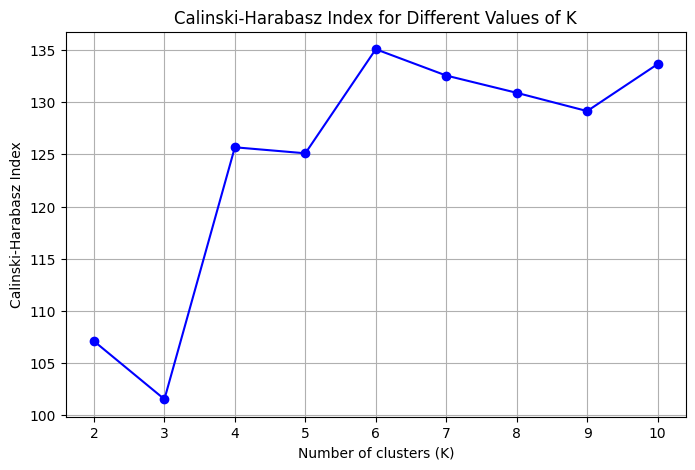

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Pilih atribut yang akan digunakan
attributes = df[['Age', 'Annual Income', 'Spending Score']]

# Standarisasi atribut
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# Inisialisasi daftar untuk menyimpan nilai Calinski-Harabasz Index
ch_scores = []

# Mencoba nilai K dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(attributes_scaled)
    ch_score = calinski_harabasz_score(attributes_scaled, labels)
    ch_scores.append(ch_score)

# Memplot hasil Calinski-Harabasz Index untuk setiap nilai K
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, 11), ch_scores, marker='o', linestyle='-', color='b')
plt.title('Calinski-Harabasz Index for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.grid()
plt.show()